In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('dataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [11]:
df['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

In [19]:
df.corr()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563,-0.212025
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518,0.007841
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968,-0.091365
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563,-0.004740
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664,-0.038346
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200,0.000329
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880,0.048424


array([[<Axes: title={'center': 'Curricular units 2nd sem (grade)'}>]],
      dtype=object)

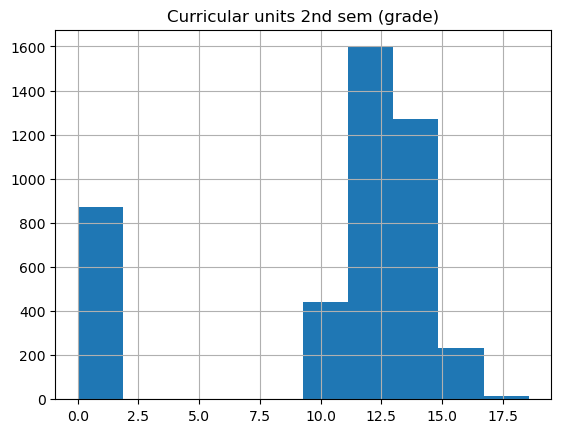

In [21]:
df.hist(column='Curricular units 2nd sem (grade)', bins=10)

<Axes: xlabel='Curricular units 2nd sem (approved)', ylabel='Curricular units 2nd sem (grade)'>

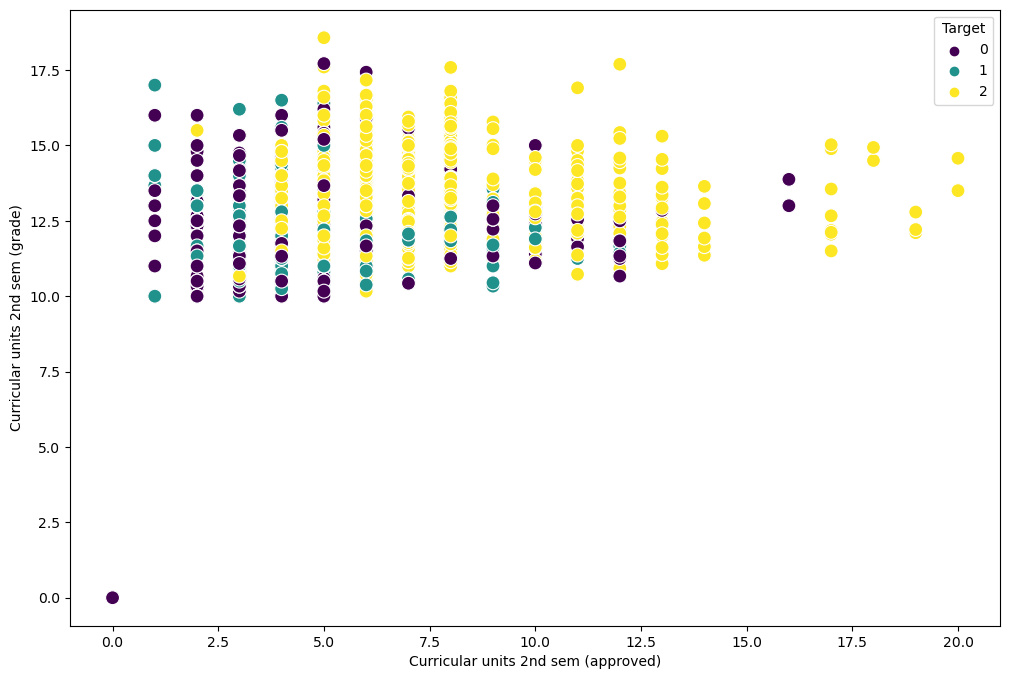

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Curricular units 2nd sem (approved)', y='Curricular units 2nd sem (grade)', hue='Target', data=df, palette='viridis', s=100)

In [22]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [24]:
X = df[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']].values


In [25]:
X[0:5]


array([[ 1.        ,  8.        ,  5.        ,  2.        ,  1.        ,
         1.        ,  1.        , 13.        , 10.        ,  6.        ,
        10.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        , 20.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 10.8       ,  1.4       ,  1.74      ,  0.        ],
       [ 1.        ,  6.        ,  1.        , 11.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  3.        ,  4.        ,
         4.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        , 19.        ,  0.        ,  0.        ,
         6.        ,  6.        ,  6.        , 14.        ,  0.        ,
         0.        ,  6.        ,  6.        ,  6.        , 13.66666667,
         0.        , 13.9       , -0.3       ,  0.

In [26]:
y = df['Target'].values

In [27]:
y[0:5]

array([0, 2, 0, 2, 2], dtype=int64)

In [28]:
from sklearn import preprocessing

# Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [29]:
X[0:5]

array([[-0.29482875,  0.21006857,  2.49089589, -1.8237439 ,  0.35008246,
        -0.38640411, -0.14558608,  0.07511091, -0.58452612, -0.32966926,
         0.4490872 ,  0.90751193, -0.10799294, -0.358167  ,  0.36813532,
         1.35764048, -0.57491418, -0.43036282, -0.15968211, -0.30081306,
        -2.52855964, -1.98606822, -1.52125739, -2.19710239, -0.19927303,
        -0.28244231, -2.83833657, -2.04262989, -1.47152688, -1.96348862,
        -0.19944099, -0.28763846,  0.12438647,  0.76576084, -1.32649743],
       [-0.29482875, -0.16740639, -0.55406775,  0.25415306,  0.35008246,
        -0.38640411, -0.14558608, -1.25449497, -1.2183802 , -0.82999749,
        -0.78646117,  0.90751193, -0.10799294, -0.358167  , -2.71639244,
         1.35764048, -0.57491418, -0.56216796, -0.15968211, -0.30081306,
        -0.10910515, -0.55019202,  0.41804989,  0.6935986 , -0.19927303,
        -0.28244231, -0.105726  , -0.52268237,  0.51890369,  0.65956171,
        -0.19944099,  0.87622207, -1.10522155,  0.

In [30]:
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [31]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3539, 35) (3539,)
Test set: (885, 35) (885,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [33]:
neigh

KNeighborsClassifier(n_neighbors=4)

In [34]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [35]:
from sklearn import metrics

print("Train set accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, y_hat))

Train set accuracy: 0.9061881887538853
Test set accuracy: 0.8056497175141243


In [36]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.8773664877083922
Test set Accuracy:  0.8011299435028248


In [37]:
from sklearn import metrics
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # train and prediction for each k
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [38]:
mean_acc

array([0.80677966, 0.79774011, 0.80451977, 0.80564972, 0.81129944,
       0.80112994, 0.8       , 0.8079096 , 0.81016949])

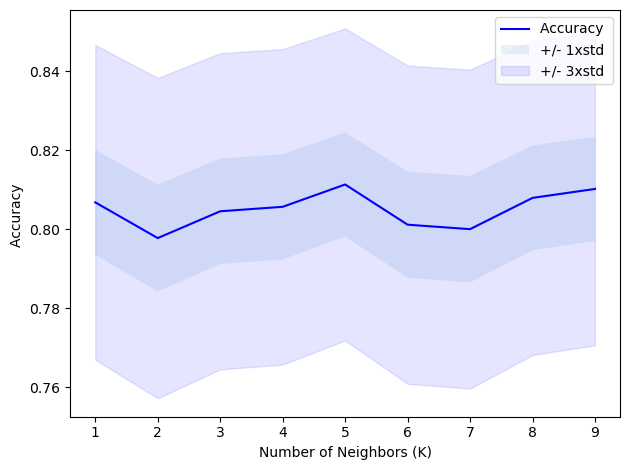

In [42]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [43]:
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy 0.8112994350282486 with k= 5


## Evaluation Metrics

In [50]:
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_hat = [1, 1, 0, 0, 0, 1, 1, 1, 1, 1]

In [51]:
# jaccard index formula
jaccard = 8 / (10 + 10 - 8)
print(jaccard)

0.6666666666666666
